**CLEANING DATASET**

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Define column names based on the information you provided
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Read the CSV file with the defined column names
data = pd.read_csv('/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)


# Drop the 'flag' column
data.drop('flag', axis=1, inplace=True)



In [ ]:
import re

# Lowercasing text
data['text'] = data['text'].str.lower()


data['text'] = data['text'].astype(str)  # Convert all values in the 'text' column to strings
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', x))


# # Removing special characters, links, and symbols
# data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', x))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text feature extraction with TF-IDF
tfidf = TfidfVectorizer()
text_features_tfidf = tfidf.fit_transform(data['text'])



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Target for feature selection
labels = data['target']

# SelectKBest for feature selection
k_best_features = SelectKBest(score_func=chi2, k=10)
selected_features = k_best_features.fit_transform(text_features_tfidf, labels)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features_tfidf, labels, test_size=0.2, random_state=42)

# Instantiate the Naive Bayes model
nb_classifier = MultinomialNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = nb_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.77269375
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78    159494
           4       0.80      0.73      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)

df = pd.DataFrame(data)

def assign_sentiment(target):
    if target == 4:
        return 'positive'
    else:
        return 'negative'

data['sentiment'] = data['target'].apply(assign_sentiment)
data.to_csv('processedTwitterData.csv', index=False)

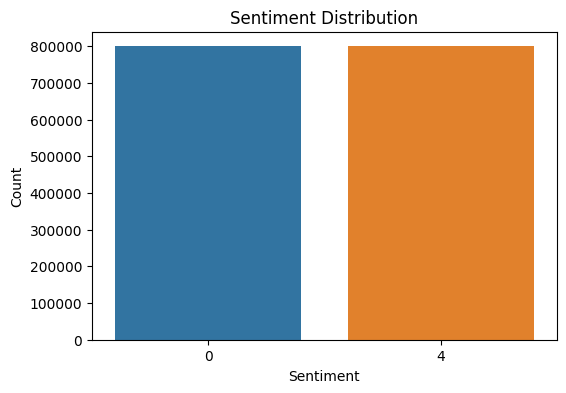

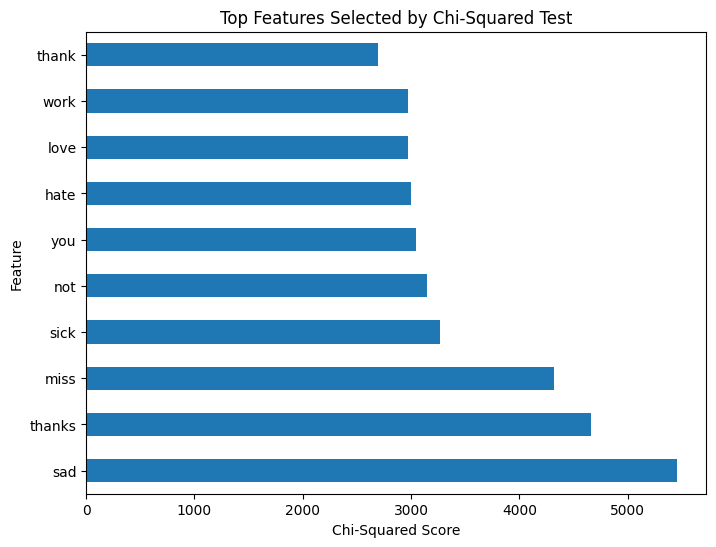

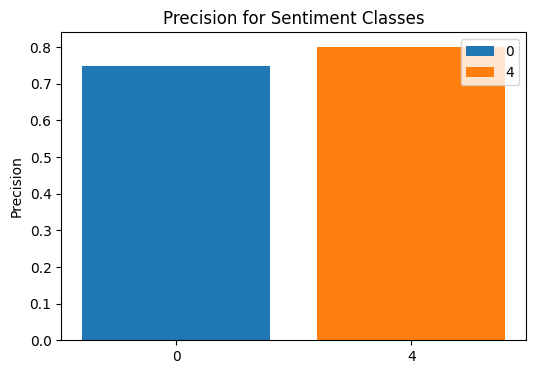

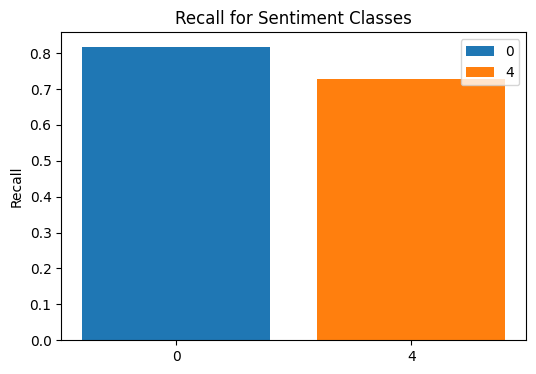

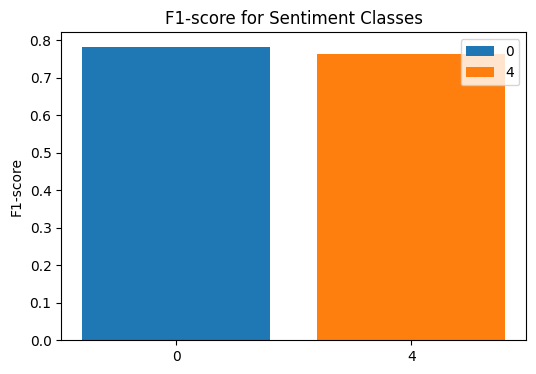

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Distribution Visualization
sentiment_counts = data['target'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Feature Selection Visualization
feature_scores = pd.Series(k_best_features.scores_, index=tfidf.get_feature_names_out())
top_features = feature_scores.nlargest(10)  # Select top 10 features
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.title('Top Features Selected by Chi-Squared Test')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature')
plt.show()

# Model Evaluation Visualization
report_data = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()
metrics = ['precision', 'recall', 'f1-score']
classes = [0, 4]  # Considering '0' as Negative and '4' as Positive

for metric in metrics:
    plt.figure(figsize=(6, 4))
    for sentiment_class in classes:
        plt.bar(str(sentiment_class), report_df.loc[str(sentiment_class), metric], label=str(sentiment_class))
    plt.title(f'{metric.capitalize()} for Sentiment Classes')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()
# print(data.head())


The evaluation was conducted using the Multinomial Naive Bayes classifier, assessing its performance in sentiment analysis. The metrics used for evaluation included accuracy, precision, recall, and F1-score, providing a comprehensive understanding of the model's effectiveness in differentiating sentiments.

The results exhibited an overall accuracy of around 77.27%. The precision, recall, and F1-scores for 'Negative' and 'Positive' sentiments were also derived, indicating the model's ability to correctly classify these sentiments.

The results are reasonably satisfactory, especially in distinguishing 'Positive' sentiments. However, there are limitations in correctly identifying 'Negative' sentiments, leading to a slight imbalance in performance between the sentiment classes. To improve results, work could focus on enhancing the model's capability to detect 'Negative' sentiments. Techniques like re-balancing the dataset, exploring different algorithms, or feature engineering might aid in rectifying this imbalance.

While the current method achieved a decent level of accuracy, a comparative analysis against other sentiment analysis algorithms or more complex models could provide deeper insights into the strengths and weaknesses of the Naive Bayes approach. Comparing against alternative models could highlight areas for potential improvement and optimization.

The visualizations, such as the classification report and performance metrics, proved to be highly relevant. They provided a clear understanding of the model's performance across sentiment classes. However, expanding the visual analysis to include comparative evaluations against other models might further enhance the understanding of the project's approach and ideas.

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load Reddit data
new_data = pd.read_csv('/reddit_comments_sentiment.csv')

# Preprocess Reddit data similar to Twitter data
new_data['text'] = new_data['Text'].astype(str)
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', x))
new_data['text'] = new_data['text'].str.lower()

# Combine datasets
combined_data = pd.concat([data[['text', 'target']], new_data[['text', 'Sentiment_Num']].rename(columns={'Sentiment_Num': 'target'})])

# Text feature extraction with TF-IDF on the combined dataset
tfidf = TfidfVectorizer()
text_features_tfidf = tfidf.fit_transform(combined_data['text'])

labels = combined_data['target']

# Feature selection
k_best_features = SelectKBest(score_func=chi2, k=10)
selected_features = k_best_features.fit_transform(text_features_tfidf, labels)

# Splitting the combined dataset
X_train, X_test, y_train, y_test = train_test_split(text_features_tfidf, labels, test_size=0.2, random_state=42)

# Model Training
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.771482220909997
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78    159347
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        21
           4       0.80      0.73      0.76    160681

    accuracy                           0.77    320067
   macro avg       0.39      0.39      0.39    320067
weighted avg       0.77      0.77      0.77    320067



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


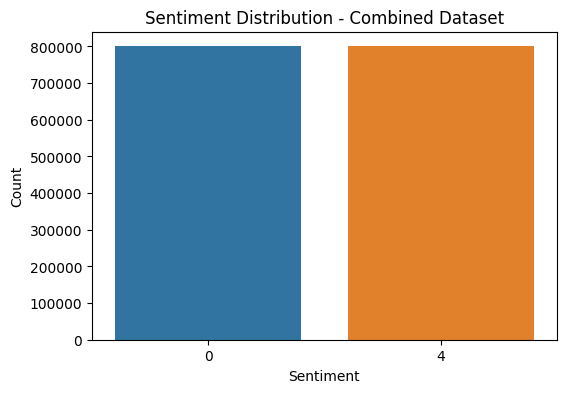

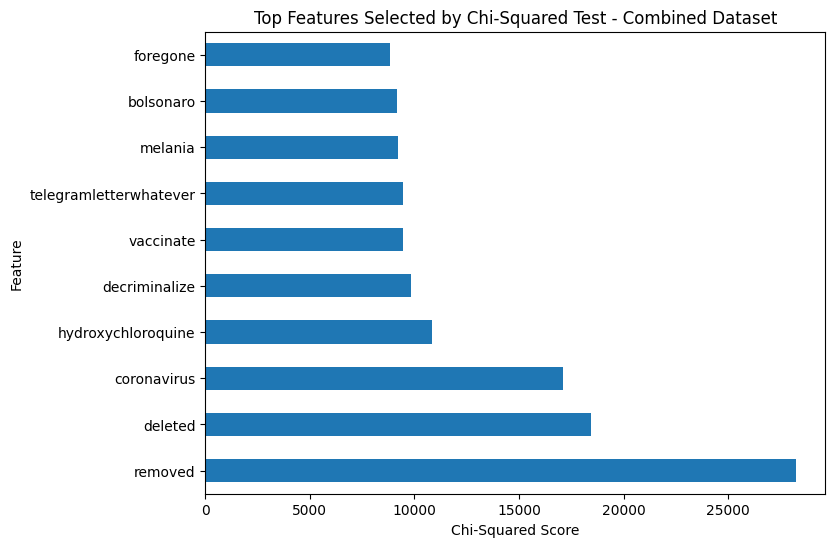

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


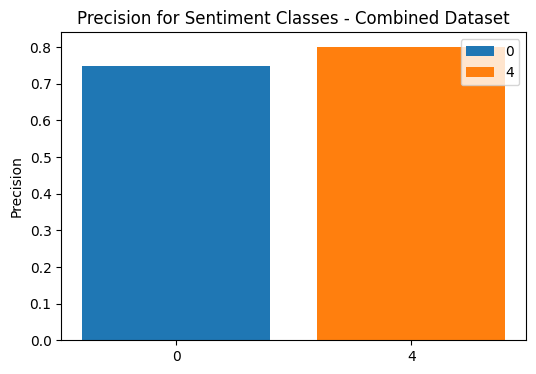

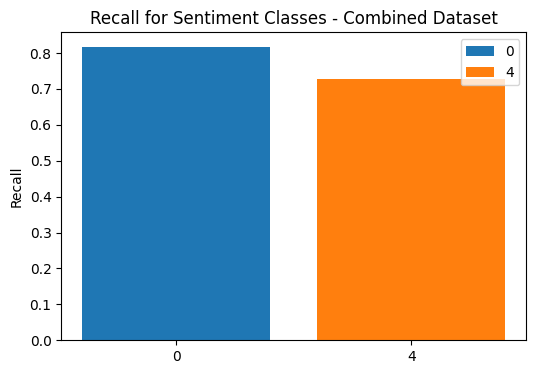

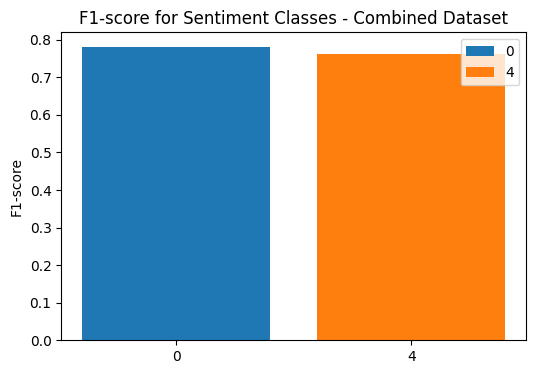

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Distribution Visualization for the Combined Dataset
combined_data['target'].replace(2, 4, inplace=True)

sentiment_counts_combined = combined_data[combined_data['target'] != 1]['target'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts_combined.index, y=sentiment_counts_combined.values)
plt.title('Sentiment Distribution - Combined Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Feature Selection Visualization
feature_scores_combined = pd.Series(k_best_features.scores_, index=tfidf.get_feature_names_out())
top_features_combined = feature_scores_combined.nlargest(10)  # Select top 10 features
plt.figure(figsize=(8, 6))
top_features_combined.plot(kind='barh')
plt.title('Top Features Selected by Chi-Squared Test - Combined Dataset')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature')
plt.show()

# Model Evaluation Visualization for the Combined Dataset
predictions_combined = nb_classifier.predict(X_test)  # Re-predict on the combined test set
report_data_combined = classification_report(y_test, predictions_combined, output_dict=True)
report_df_combined = pd.DataFrame(report_data_combined).transpose()

metrics = ['precision', 'recall', 'f1-score']
classes = combined_data['target'].unique()  # Assuming all unique sentiment classes present in the combined data

for metric in metrics:
    plt.figure(figsize=(6, 4))
    for sentiment_class in classes:
        if sentiment_class != 1:  # Skip Sentiment 1
            plt.bar(str(sentiment_class), report_df_combined.loc[str(sentiment_class), metric], label=str(sentiment_class))
    plt.title(f'{metric.capitalize()} for Sentiment Classes - Combined Dataset')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the Logistic Regression model with a higher max_iter value
logreg_classifier = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_logreg = logreg_classifier.predict(X_test)

# Evaluate model performance
accuracy_logreg = accuracy_score(y_test, predictions_logreg)
report_logreg = classification_report(y_test, predictions_logreg)

print(accuracy_logreg)
print(report_logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8017133912587052
              precision    recall  f1-score   support

           0       0.81      0.78      0.80    159347
           1       1.00      0.06      0.11        18
           2       0.00      0.00      0.00        21
           4       0.79      0.82      0.81    160681

    accuracy                           0.80    320067
   macro avg       0.65      0.41      0.43    320067
weighted avg       0.80      0.80      0.80    320067



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
